# 시계열 데이터 분석하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-numpy의-polyfit으로-회귀분석" data-toc-modified-id="1.-numpy의-polyfit으로-회귀분석-1">1. numpy의 polyfit으로 회귀분석</a></span></li><li><span><a href="#2.-prophet을-이용한-forecast-예측" data-toc-modified-id="2.-prophet을-이용한-forecast-예측-2">2. prophet을 이용한 forecast 예측</a></span></li><li><span><a href="#3.-Seasonal-시계열-분석으로-주식-데이터-분석하기" data-toc-modified-id="3.-Seasonal-시계열-분석으로-주식-데이터-분석하기-3">3. Seasonal 시계열 분석으로 주식 데이터 분석하기</a></span></li><li><span><a href="#4.-growth-model" data-toc-modified-id="4.-growth-model-4">4. growth model</a></span></li></ul></div>

## 1. numpy의 polyfit으로 회귀분석

In [1]:
from datetime import datetime
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Importing plotly failed. Interactive plots will not work.


In [2]:
# 폰트 재설정
plt.rc('font', family='NanumGothic')
plt.rc('font', size=13)

In [3]:
# 데이터 불러오기
pinkwink_web = pd.read_csv('source/07.시계열데이터예측/08. PinkWink Web Traffic.csv',
                           encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web.hit.notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


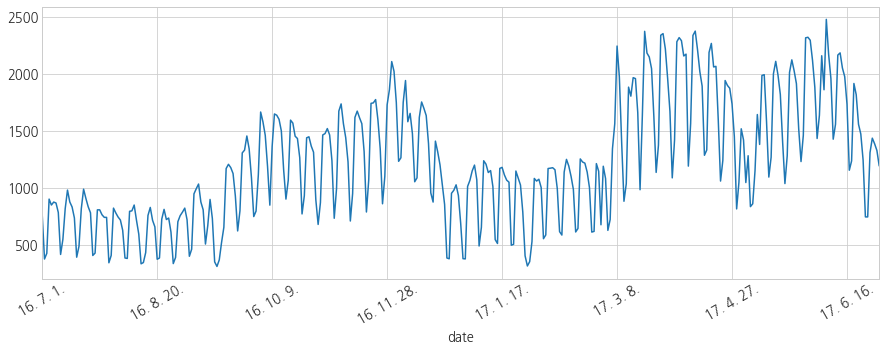

In [4]:
pinkwink_web.hit.plot(figsize=(15, 5))
plt.xticks(rotation=30)
plt.show()

* 주기를 한 눈에 알기는 어렵다.

In [5]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web.hit.values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

for f, n in zip([f1, f2, f3, f15], [1, 2, 3, 15]):
    print('{:<2}차 함수의 error: {:.2f}'.format(n, error(f, time, traffic)))

1 차 함수의 error: 430.86
2 차 함수의 error: 430.63
3 차 함수의 error: 429.53
15차 함수의 error: 330.48


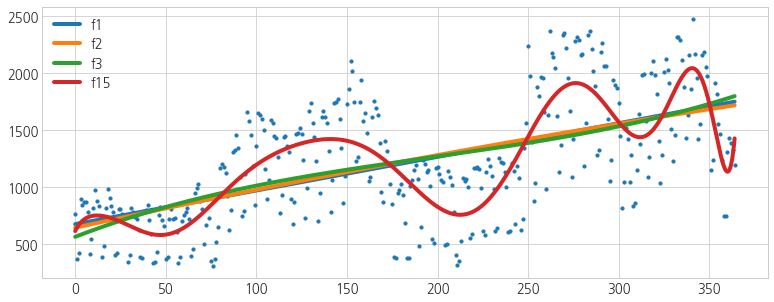

In [8]:
plt.figure(figsize=(13, 5))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')
plt.legend()
plt.show()

## 2. prophet을 이용한 forecast 예측

In [9]:
df = pd.DataFrame({'ds': pinkwink_web.index, 'y': pinkwink_web.hit})
df.reset_index(inplace=True)
df.ds = pd.to_datetime(df.ds, format='%y. %m. %d.')
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [11]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [12]:
forecast = m.predict(future)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,689.936817,1132.580562
421,2017-08-26,497.711704,300.196054,711.799048
422,2017-08-27,630.268176,422.352880,842.349546
423,2017-08-28,1182.888299,958.235624,1406.692561
424,2017-08-29,1218.800002,1018.678068,1421.890140


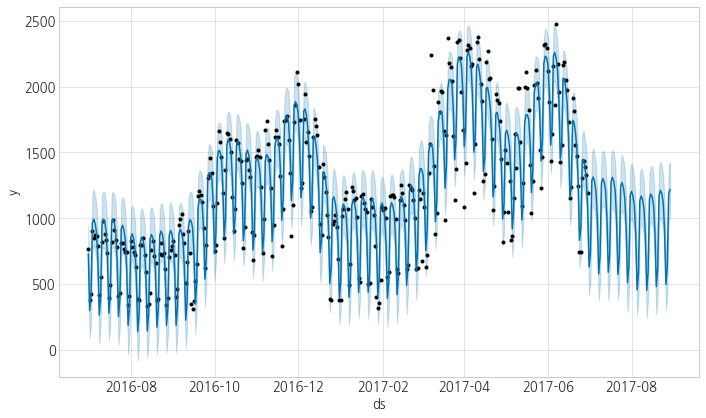

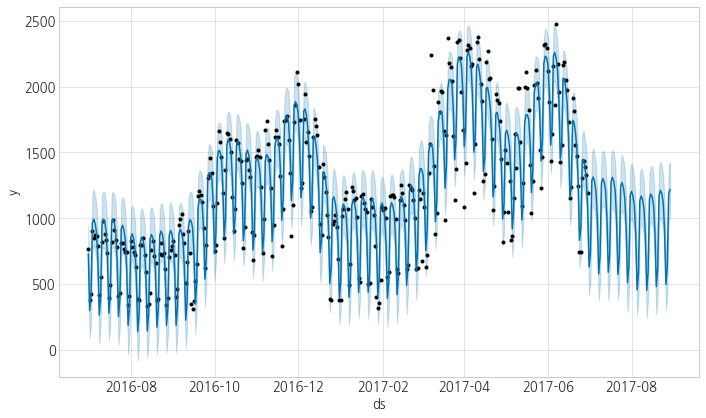

In [14]:
m.plot(forecast)

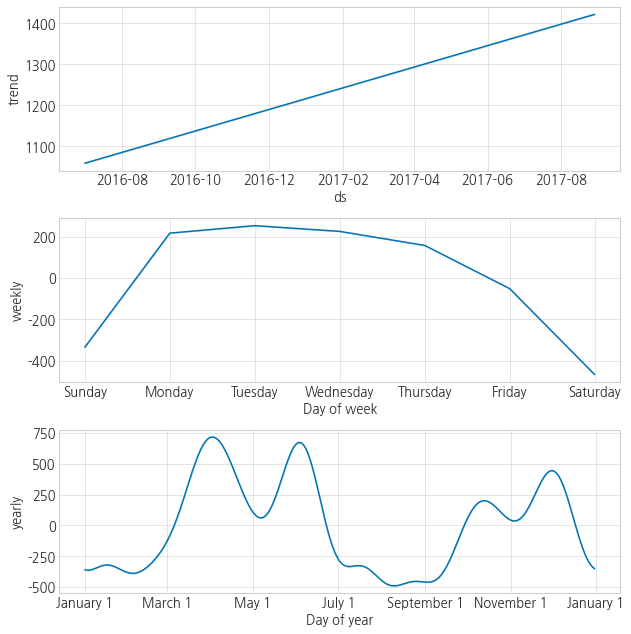

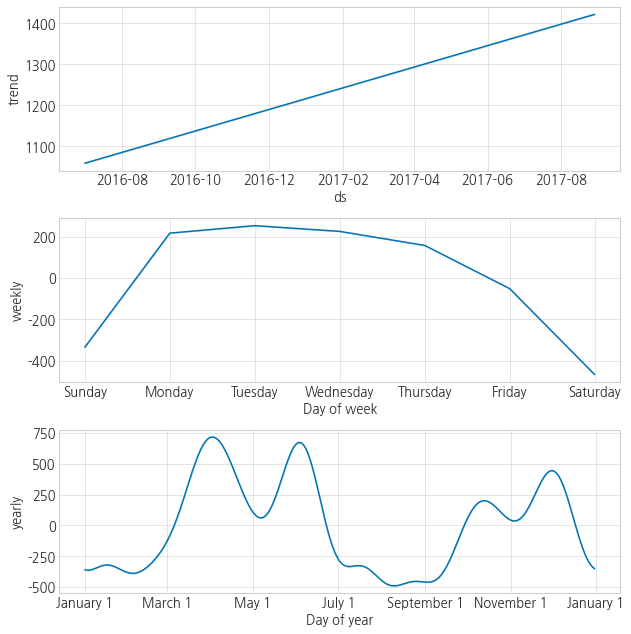

In [15]:
m.plot_components(forecast)

## 3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [16]:
from pandas_datareader import data
start_date = '1990-1-1'
end_date = '2017-6-30'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500


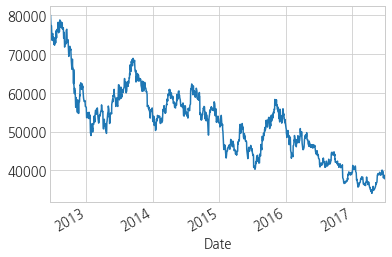

In [17]:
KIA.Close.plot()

In [18]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500
...,...,...,...,...,...,...
2016-12-23,39350,38650,38700,39100,1070783,39100
2016-12-26,39350,38850,39100,39000,465612,39000
2016-12-27,39700,39050,39050,39500,879686,39500


In [19]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2012-06-18,80000
1,2012-06-19,80000
2,2012-06-20,80000
3,2012-06-21,78800
4,2012-06-22,77500


In [20]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=365)

In [22]:
future.tail()

,ds
1482,2017-12-25
1483,2017-12-26
1484,2017-12-27
1485,2017-12-28
1486,2017-12-29


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1482,2017-12-25,18814.421502,1369.096072,37094.799458
1483,2017-12-26,18810.028320,1244.054243,37681.440021
1484,2017-12-27,18622.011185,500.834942,36647.634367
1485,2017-12-28,18419.557301,1151.226539,37453.514422
1486,2017-12-29,18197.508694,398.269773,36930.414363


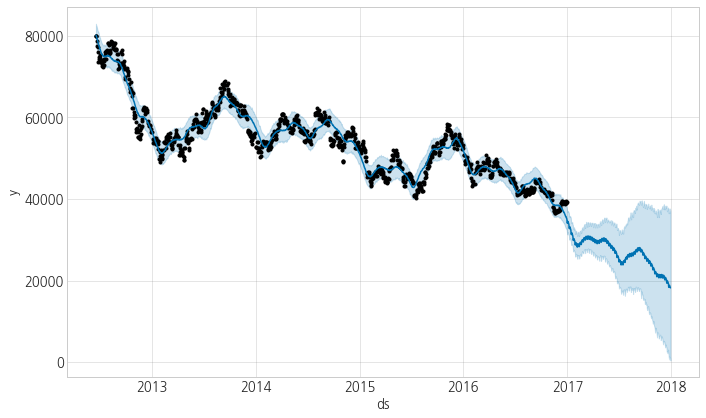

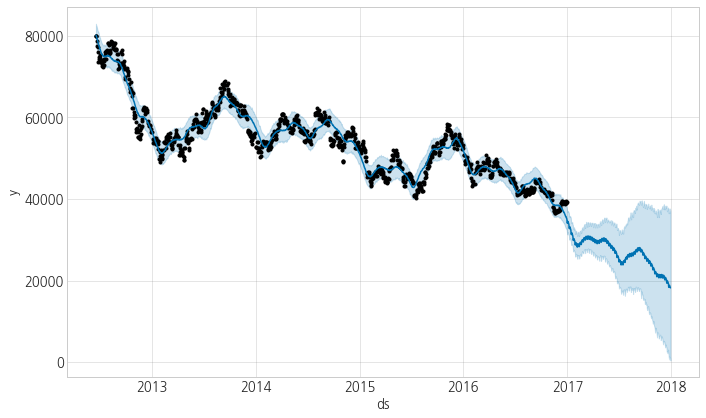

In [24]:
m.plot(forecast)

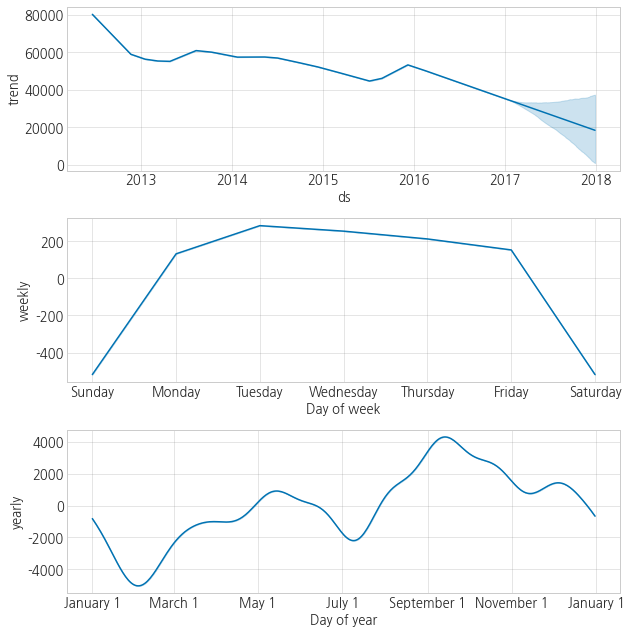

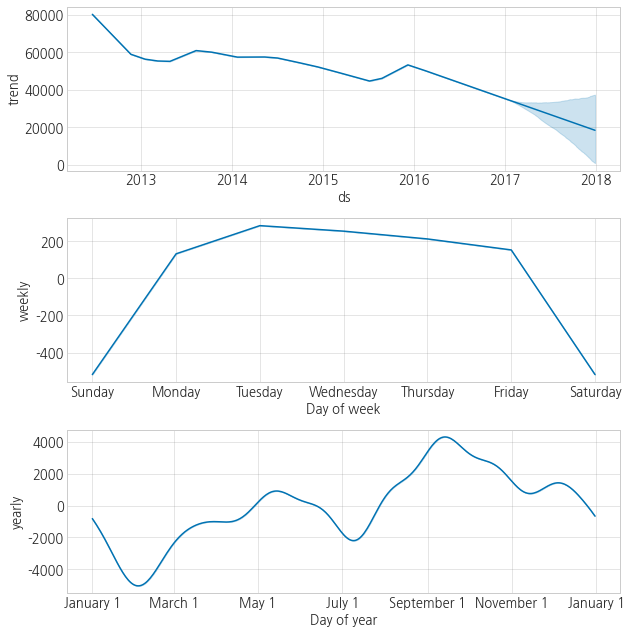

In [25]:
m.plot_components(forecast)

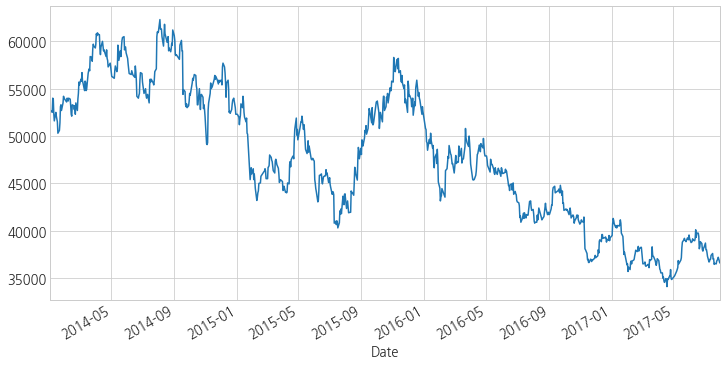

In [26]:
start_date = '2014-1-1'
end_date = '2017-7-31'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12, 6))

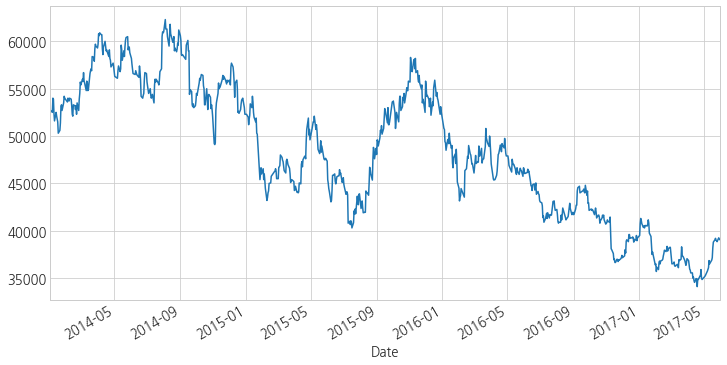

In [27]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12, 6))

In [28]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [29]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


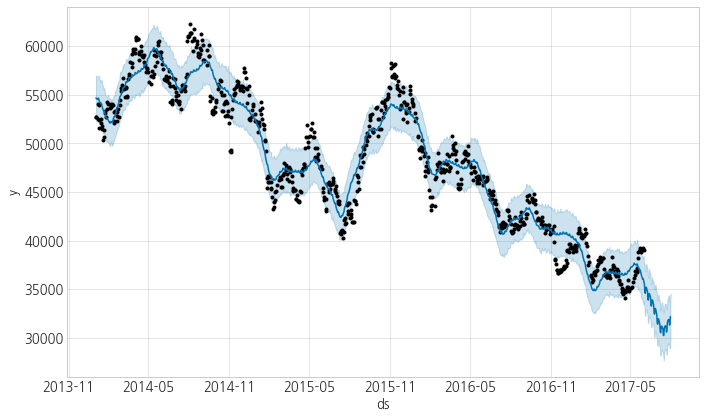

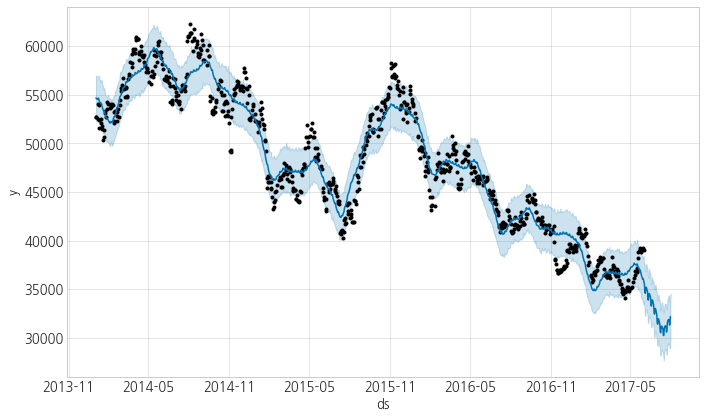

In [31]:
forecast = m.predict(future)
m.plot(forecast)

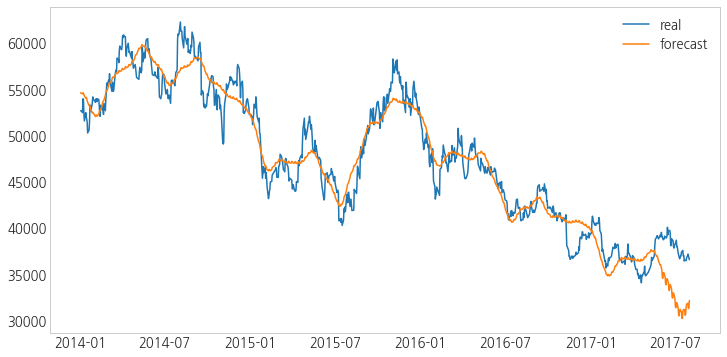

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 4. growth model

In [33]:
df = pd.read_csv('source/07.시계열데이터예측/08.20example_wp_R.csv')
df['y'] = np.log(df['y'])
df['cap'] = 8.5

In [34]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

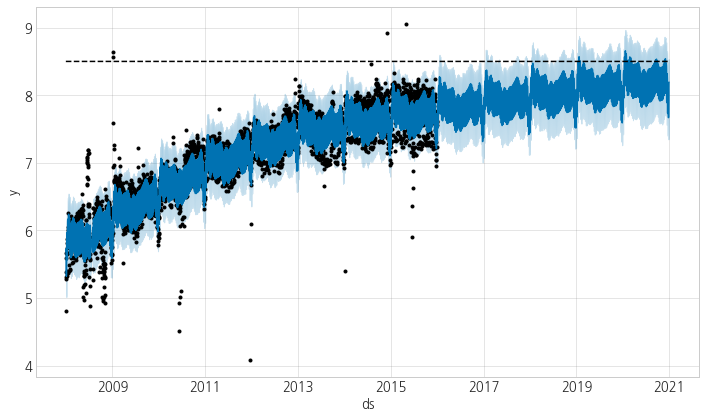

In [35]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

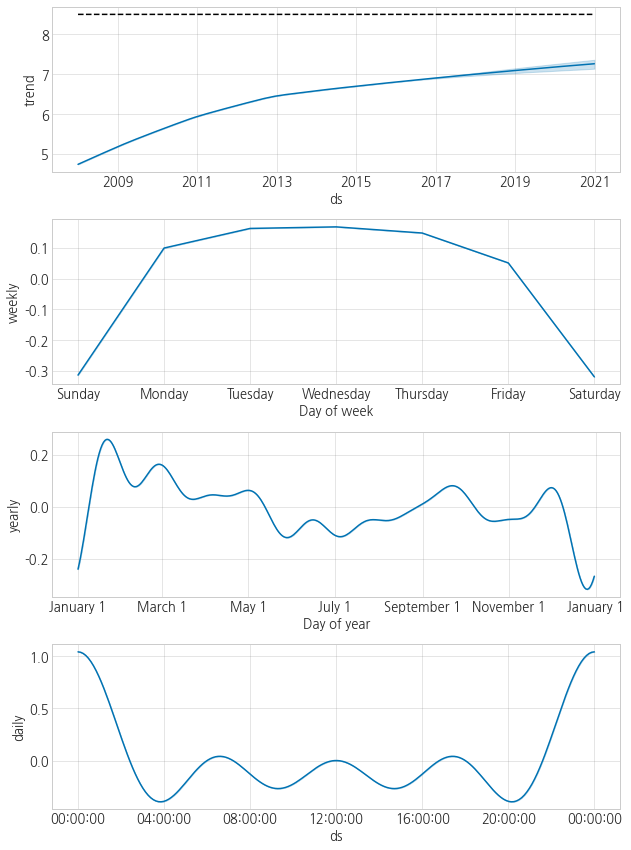

In [36]:
forecast = m.predict(future)
m.plot_components(forecast);